# Financial Services Use In Tanzania


In [50]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Tanzania-Mobile-Money

The training dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge. 

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets, in this case, included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was 
collected by FSDT



### The survey has five main objectives:

• To understand the behavior (cash flow management, investing, saving, etc.) and define the financial service needs of consumers (individuals, farmers, business owners).

• To establish credible benchmarks and measure the effectiveness of financial inclusion.

• To provide insights into policy, regulatory and market obstacles to access and usage of financial services.

• To provide insights which will feed into innovation within the financial and real sectors.

• To highlight opportunities for policy review needed to drive financial sector development.

### Methodology.

The methodology used in the survey was sampling.

Sampling Design - A multi-stage stratified sampling approach was used to achieve a representative sample of individuals aged 16 years and older. The sample frame was based on the 2012 Tanzania Population and Housing Census. The various stages of the selection of the sample are discussed below.

Key sampling statistics - From the sampling done, they targeted 1, 000 Enumeration Areas, with 10 Interviews per in each area they achieved to do the survey successfully in 998 areas. Their targeted Sample was 10,000 Respondents, they were able to achieve respondents which equate 9459 which is a 95% achieved despondence rate and only 7094 are available in the dataset. 

Data collection period: April to July 2017

In this report, I will visualize the data with graphs. To cover the relationships between the variable to be able to compare describe and define all the relationships from the results got from the survey.

#### 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [89]:
# reading csv
mob_mon= pd.read_csv('resources/training.csv')
mob_mon.info()

#missing values
missing_values = mob_mon.isnull().sum().sum()
print('\nNumber of missing values:',missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

- From the examination of my dataset. I can conclude that there are no missing values. The type of dataset we working on is a Pandas Dataframe with 37 data columns and 7094 entries. The data types in this dataset are float(2) and intent(35).

#### 2. Get basic descriptive statistics for the dataset.

In [90]:
# Renaming all columns I am required to work with.

mob_mon = mob_mon.rename(columns={'Q1':'age','Q2':'gender','Q3':'marital_status','Q6':'land_ownership'
                                  ,'Q13':'mobile_money_usage'})


mob_mon_incomes = mob_mon[["Q8_1" ,"Q8_2","Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11"]] 

income_type = {
    "Q8_1":'salaries',
    "Q8_2":'trading',
    "Q8_3":'service',
    "Q8_4":'piece_work',
    "Q8_5":'rental_income',
    "Q8_6":'interest',
    "Q8_7":'pension',
    "Q8_8":'social_welfare',
    "Q8_9":'rely_on_someone',
    "Q8_10":'dont_get_money',
    "Q8_11":'other'}


mob_mon = mob_mon.rename(columns={
    "Q8_1":'salaries',
    "Q8_2":'trading',
    "Q8_3":'service',
    "Q8_4":'piece_work',
    "Q8_5":'rental_income',
    "Q8_6":'interest',
    "Q8_7":'pension',
    "Q8_8":'social_welfare',
    "Q8_9":'rely_on_someone',
    "Q8_10":'dont_get_money',
    "Q8_11":'other'
})

In [53]:
mob_mon.head()

,ID,age,gender,marital_status,Q4,Q5,land_ownership,Q7,salaries,trading,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [54]:
# Getting descriptive stats on my dataset.
mob_mon = mob_mon.drop(['ID'], axis=1)
summary = mob_mon.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
age,7094.0,38.239498,16.332148,16.0,25.0,35.0,48.0,100.0
gender,7094.0,1.559910,0.496433,1.0,1.0,2.0,2.0,2.0
marital_status,7094.0,1.787426,1.165160,1.0,1.0,1.0,3.0,4.0
Q4,7094.0,3.060051,1.557779,1.0,2.0,3.0,3.0,8.0
Q5,7094.0,2.548915,1.534257,1.0,1.0,3.0,4.0,6.0


In [55]:
# Changed values to male and female
mob_mon.gender= ['male' if each == 1 else 'female' for each in mob_mon.gender]

# Checking the number of entries for males:
males = mob_mon[mob_mon.gender == 'male']
m1 = len(males[males.mobile_money == 1])
m2 = len(males[males.mobile_money == 0]) 
m = m1 + m2
print('Total number of males:',m)
print('Males with Mobile Money:',m1)
print('Males without Mobile Money:',m2,)

# Checking the number of entries for males:
females = mob_mon[mob_mon.gender == 'female']
f1 = len(females[females.mobile_money == 1])
f2 = len(females[females.mobile_money == 0])
f = f1 + f2
print('\nTotal number of females:',f)
print('Females with Mobile Money:',f1)
print('Females without Mobile Money:',f2)

# Checking the youngest & oldest entrant in the database. 
youngest = mob_mon[mob_mon.age.notnull()].sort_values('age')[['gender','age']].head(1)
oldest = mob_mon[mob_mon.age.notnull()].sort_values('age')[['gender','age']].tail(1)

print('\nThe youngest is ', youngest.gender.values, youngest.age.values)
print('the oldest is: ', oldest.gender.values, oldest.age.values)

Total number of males: 3122
Males with Mobile Money: 1959
Males without Mobile Money: 1163

Total number of females: 3972
Females with Mobile Money: 1971
Females without Mobile Money: 2001

The youngest is  ['male'] [16]
the oldest is:  ['male'] [100]


- The data split is 56% to 44%, where 56% is females which is a total of 3972. Females that have mobile money are 1971 and those without mobile money are 2001. Males in the whole dataset are 3122 in total with 1959 having mobile money and 1163 without mobile money. The average age of a female with mobile money is 36 and the average age of a female without a mobile is 39. The average age of a female with mobile money is 37 and the average age of a female without a mobile is 43. 

#### 3. Create appropriate graphs to visually represent the relationship between financial services accessed (non, momible, both) and age, gender, marital status, land ownership and type of income.

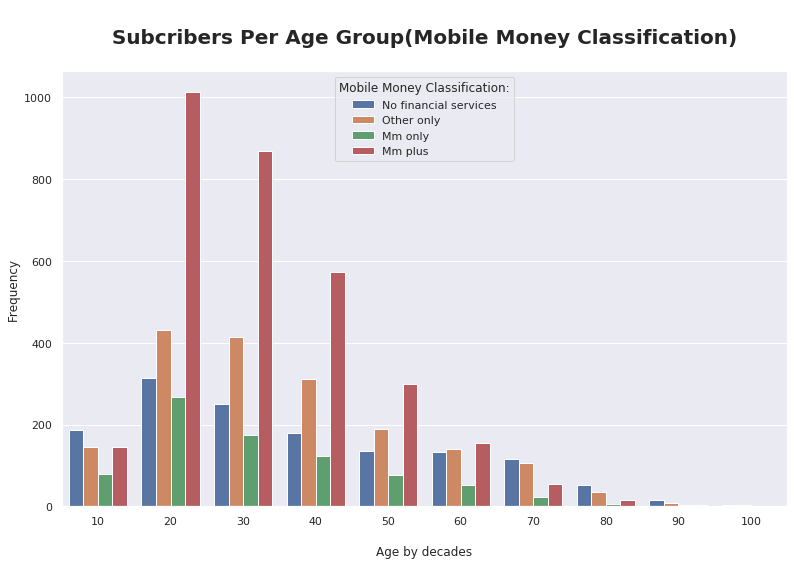

In [132]:
# Comparing Mobile Money Classification with Age.

mob_mon['Age_by_decades'] = mob_mon.age.apply(lambda x : int(x/10) * 10)
plt.figure(figsize = (13,8))
sns.countplot(x = 'Age_by_decades', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nSubcribers Per Age Group(Mobile Money Classification)\n',fontsize=20, weight='bold')
plt.xlabel('\nAge by decades')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.show()


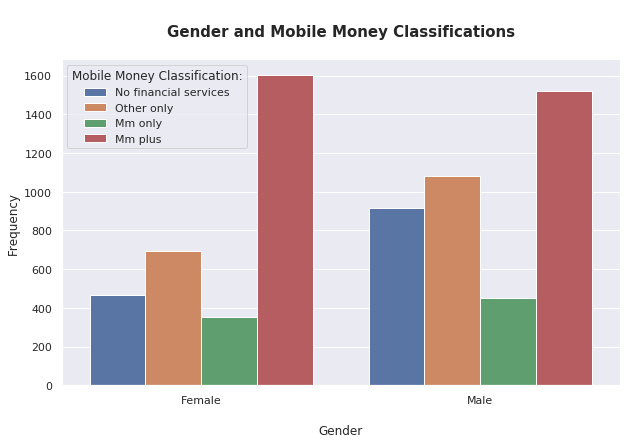

In [133]:
# Comparing Mobile Money Classification with Gender.

plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nGender and Mobile Money Classifications\n', fontsize = 15, weight='bold')
plt.xlabel('\nGender')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(2), ['Female', 'Male'])
plt.show()

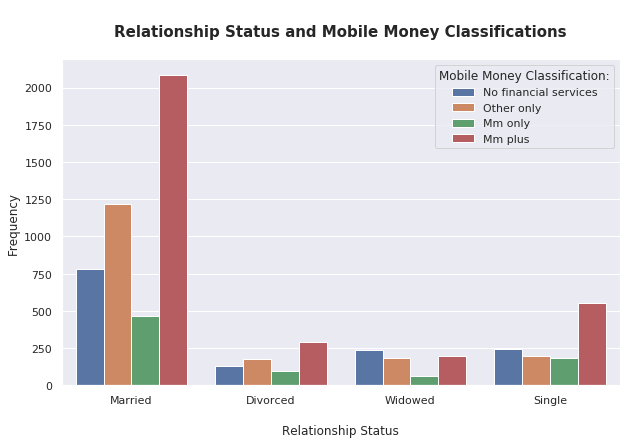

In [134]:
# Comparing Mobile Money Classification with Marital Status.

plt.figure(figsize = (10,6))
sns.countplot(x = 'marital_status', hue = 'mobile_money_classification', data = mob_mon)
plt.title('\nRelationship Status and Mobile Money Classifications\n', fontsize = 15, weight='bold')
plt.xlabel('\nRelationship Status')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(4), ['Married', 'Divorced', 'Widowed', 'Single'])
plt.show()


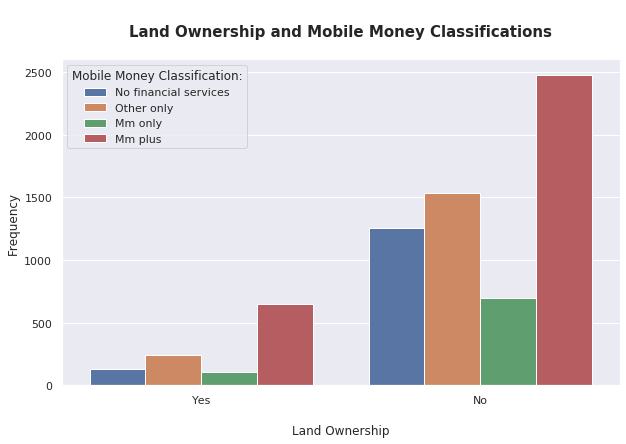

In [135]:
# Comparring Land ownership with Mobile Money Classification

plt.figure(figsize = (10,6))
sns.countplot(x = 'land_ownership', hue = 'mobile_money_classification',data = mob_mon)
plt.title('\nLand Ownership and Mobile Money Classifications\n', fontsize = 15, weight='bold')
plt.xlabel('\nLand Ownership')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(2), ['Yes', 'No'])
plt.show()


In [136]:
income = mob_mon.loc[:, ['salaries','trading','service','piece_work','rental_income','interest','pension'
                              ,'social_welfare','rely_on_someone','dont_get_money','other','mobile_money_classification']]

# Group by mobile money classification and sum
income_types = income.groupby(['mobile_money_classification']).sum()

income_types

,salaries,trading,service,piece_work,rental_income,interest,pension,social_welfare,rely_on_someone,dont_get_money,other
mobile_money_classification,,,,,,,,,,,
0,19,773,35,416,12,2,3,37,267,165,0
1,31,1280,62,650,10,8,3,59,231,71,0
2,30,433,51,277,7,2,4,7,144,78,2
3,361,1984,264,1050,38,22,24,28,470,96,7


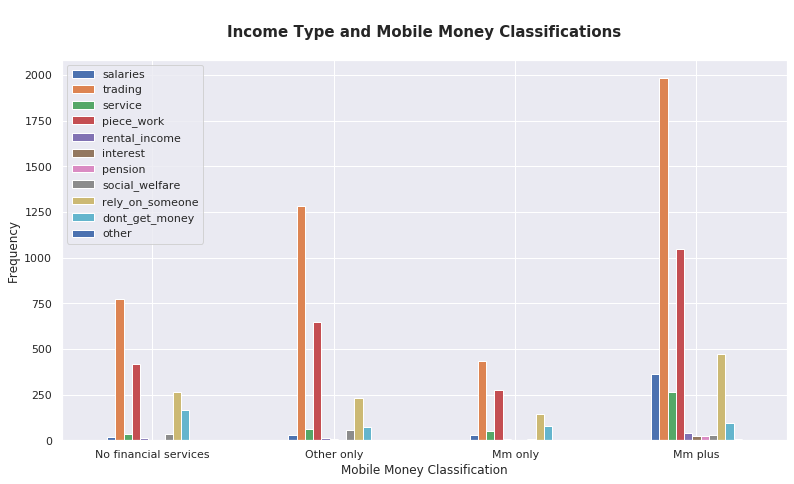

In [137]:
# Plot
fig, axes = plt.subplots(figsize=(13, 7))
income_types.plot(kind='bar', ax=axes, rot=0)
plt.title('\nIncome Type and Mobile Money Classifications\n', fontsize=15, weight='bold')
plt.xlabel('Mobile Money Classification')
plt.xticks(np.arange(4),['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.ylabel('Frequency')
plt.show()

- Males use mobile money more than females.
- More young people use mobile money than elders so our data 	set is more skewed to the left.
- Married people use mobile money more than divorced, widowed 	or single people and still more married people do not have 	mobile money than all the other relationship status people.
- People that do not have land ownership use have the highest 	percentage on the piechart and do not use Mobile money, 		and those who do have land have the lowest percentage and 	do not use mobile money also.
- With income types people without mobile money do not use 		mobile money besides in the trading type of income.

#### 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.


<Figure size 7200x5040 with 0 Axes>

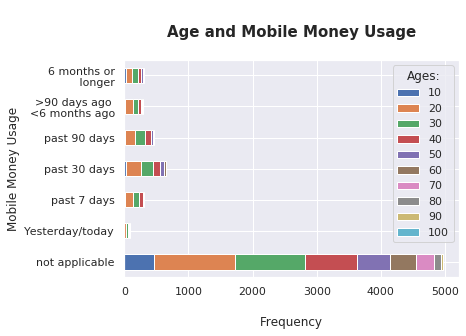

In [139]:
# Comparing Mobile Money Usage with Age.

sns.set()
plt.figure(figsize = (100,70))
age = mob_mon.groupby(['Age_by_decades', 'mobile_money_usage']).size().reset_index().pivot(columns='Age_by_decades', index='mobile_money_usage', values=0)
age.plot(kind='barh', stacked=True)
plt.title('\nAge and Mobile Money Usage\n', fontsize = 15, weight='bold')
plt.xlabel('\nFrequency')
plt.ylabel('Mobile Money Usage')
plt.legend(title = 'Ages:',loc = 'best')
plt.yticks(np.arange(7), ['not applicable','Yesterday/today' ,'past 7 days' ,'past 30 days' ,'past 90 days' 
                          ,'>90 days ago \n<6 months ago'  ,'6 months or\n longer' ], rotation=0)
plt.show()

<Figure size 7200x5040 with 0 Axes>

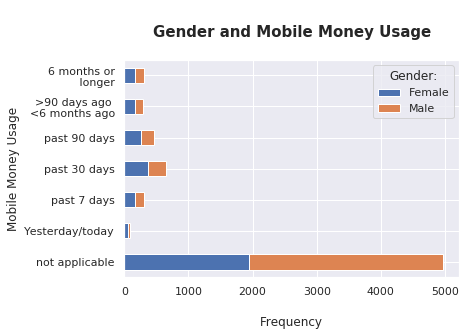

In [128]:
# Comparing Mobile Money Usage with Gender.

sns.set()
plt.figure(figsize = (100,70))
land = mob_mon.groupby(['gender', 'mobile_money_usage']).size().reset_index().pivot(columns='gender', index='mobile_money_usage', values=0)
land.plot(kind='barh', stacked=True)
plt.title('\nGender and Mobile Money Usage\n', fontsize = 15, weight='bold')
plt.xlabel('\nFrequency')
plt.ylabel('Mobile Money Usage')
plt.legend(title = 'Gender:', labels = ['Female', 'Male'])
plt.yticks(np.arange(7), ['not applicable','Yesterday/today' ,'past 7 days' ,'past 30 days' ,'past 90 days' 
                          ,'>90 days ago \n<6 months ago'  ,'6 months or\n longer' ], rotation=0)
plt.show()

<Figure size 10800x720 with 0 Axes>

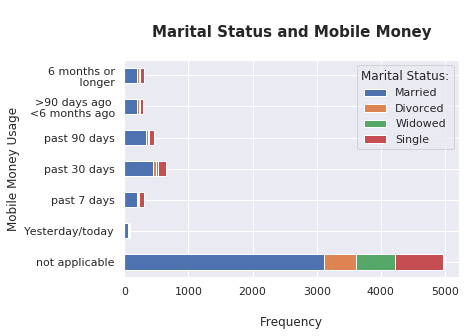

In [129]:
# Comparing Mobile Money Usage with Relationship Status.
sns.set()
plt.figure(figsize = (150,10))
land = mob_mon.groupby(['marital_status', 'mobile_money_usage']).size().reset_index().pivot(columns='marital_status', index='mobile_money_usage', values=0)
land.plot(kind='barh', stacked=True)
plt.title('\nMarital Status and Mobile Money\n', fontsize = 15, weight='bold')
plt.xlabel('\nFrequency')
plt.ylabel('Mobile Money Usage')
plt.legend(title = 'Marital Status:',labels=['Married', 'Divorced', 'Widowed', 'Single'],loc = 'best')
plt.yticks(np.arange(7), ['not applicable','Yesterday/today' ,'past 7 days' ,'past 30 days' ,'past 90 days' 
                          ,'>90 days ago \n<6 months ago'  ,'6 months or\n longer' ], rotation=0)
plt.show()

<Figure size 7200x5040 with 0 Axes>

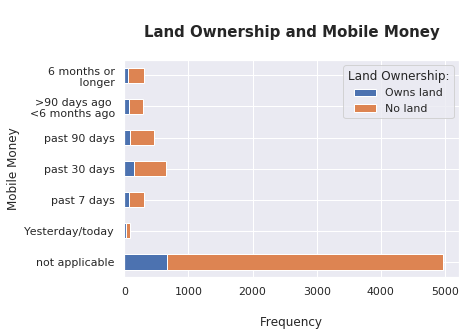

In [125]:
# Comparring Land ownership with Mobile Money Usage

sns.set()
plt.figure(figsize = (100,70))
land = mob_mon.groupby(['land_ownership', 'mobile_money_usage']).size().reset_index().pivot(columns='land_ownership', index='mobile_money_usage', values=0)
land.plot(kind='barh', stacked=True)
plt.title('\nLand Ownership and Mobile Money\n', fontsize = 15, weight='bold')
plt.xlabel('\nFrequency')
plt.ylabel('Mobile Money')
plt.legend(title = 'Land Ownership:',labels=['Owns land', 'No land'],loc = 'best')
plt.yticks(np.arange(7), ['not applicable','Yesterday/today' ,'past 7 days' ,'past 30 days' ,'past 90 days' 
                          ,'>90 days ago \n<6 months ago'  ,'6 months or\n longer' ], rotation=0)
plt.show()


In [91]:
# Comparing Mobile Money Usage with Income Type.
income = mob_mon.loc[:, ['salaries','trading','service','piece_work','rental_income','interest','pension',
                  'social_welfare','rely_on_someone','dont_get_money','other','mobile_money_usage']]

# Group by mobile money purchases and sum
incomes = income.groupby(['mobile_money_usage']).sum()
incomes

,salaries,trading,service,piece_work,rental_income,interest,pension,social_welfare,rely_on_someone,dont_get_money,other
mobile_money_usage,,,,,,,,,,,
-1,127,3182,204,1725,36,21,12,121,845,338,1
1,22,54,8,18,1,0,3,0,5,2,0
2,64,180,39,97,8,2,2,1,36,5,2
3,125,373,71,202,10,6,8,5,85,20,2
4,55,281,45,162,6,1,4,0,53,18,2
5,25,190,27,97,1,4,2,1,40,11,1
6,23,210,18,92,5,0,3,3,48,16,1


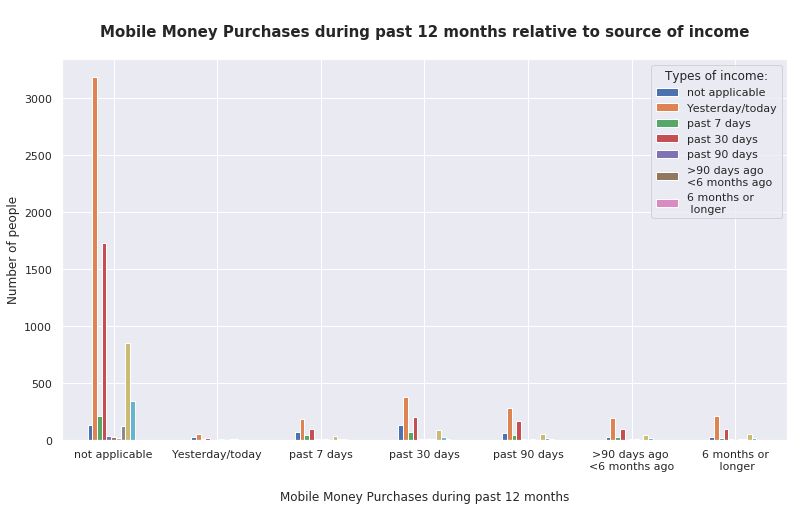

In [127]:
# Plot
fig, axes = plt.subplots(figsize=(13, 7))
incomes.plot(kind='bar', ax=axes, rot=0)
plt.title('\nMobile Money Purchases during past 12 months relative to source of income\n', fontsize=15, weight='bold')
plt.xlabel('\nMobile Money Purchases during past 12 months\n')
plt.legend(title='Types of income:',labels=['not applicable','Yesterday/today' ,'past 7 days' ,'past 30 days' ,'past 90 days' 
                          ,'>90 days ago \n<6 months ago'  ,'6 months or\n longer' ], loc='best')
plt.xticks(np.arange(7), ['not applicable','Yesterday/today' ,'past 7 days' ,'past 30 days' ,'past 90 days' 
                          ,'>90 days ago \n<6 months ago'  ,'6 months or\n longer' ], rotation=0)
plt.ylabel('Number of people');

- People with access to Mobile services use Mobile money than 	those who do not have access to mobile services.


#### 5. What can you conclude about use of financial services in Tanzania? Which demographic factors are associated with mobile money use?

In [ ]:
for column,label in income_type.items():
    mob_mon_incomes[column] = [label if each ==1 else 'none' for each in mob_mon_incomes[column]]
mob_mon_incomes.head(1)

x = [1,2,3,2,2,2,3,4]
def remove_none(whatever):
    return [x for x in whatever if x != "none"]

income = []
for index, row in mob_mon_incomes.iterrows():
    # this will give you a list of values in your row.
    row = list(row)

    # you want to remove all "none" values from your list.
    nfl = remove_none(row)

    # *if* your list is empty after the process of elimination, you want to append "No income".
    if len(nfl) == 0:
        nfl.append("No income")
    
    income.append(nfl)

mob_mon['income_type'] = income


mob_mon = mob_mon.head(50)

In [ ]:
import sys
#!{sys.executable} -m pip install folium --user
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

In [ ]:
# Creating a map for tanzania.
lat = -6.3728253; 
lon = 34.8924826
income_type_map = folium.Map(location = [lat, lon], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_type_map)

# add markers to map
for lat, lng, label in zip(mob_mon['Latitude'], mob_mon['Longitude'], 
                           mob_mon['income_type']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_type_map


- From our map we are able to identify how our map we can clearly see that most of the people that use mobile money live by the costal are and their main source of income is by trading. and most people that use mobile money are female, married people and a lot of youth (this are people in the ages between 25-35). Not a lot of people also use mobile money, factors also might be that do not recieve income, do not have people to send or recieve money from using the services. few of elder people participate in the utilising of mobile money this mightbe that they have children and family members that send them money through mobile money.
